# Political Persuasion

## Business Problem Introduction

**Background**

The following case study centers around the idea of political targeting to sway voter opinion using campaign marketing. Similar to identifying a customer's propensity to purchase and targeting them with marketing communication, the general goal it to create a predictive model to understand propensity to "respond" to a political targeting campaign. However, just modeling propensity may not be sufficient enough, as a customer or voter may have already been likely to respond in the absence of marketing. 

In this case, an experiment consisted of the following steps:

1. Conduct a pre-survey of the voters to determine their inclination to vote Democratic
2. Randomly split the into two samples -- control and treatment
3. Send a flyer promoting the Democratic candidate to the treatment group
4. Conduct another survey of the voters to determine their inclination to vote Democratic

The campaign has limited resources and wants to optimize their next sendout to the top 10% of voters. The goal of this project will be to use machine learning to maximize the effectiveness of the next campaign.  

**Data**

Data for this case consists of a variables to indicate if a voter's opinion moved in favor of the Democratic candidate as well as if they recevied the treatment flyer. Additional variables come from a variety of sources:

1. Government voter files
2. Political party files
3. Commerical consumer and demogrpahic data
4. Census neighborhood data

A complete data dictionary has not been provided, so we will initially start with only a subset of variables provided. If possible, we would also consult with the data provided to understand the data definitions and determine the appropriateness for modeling. 

For the sake of this case, let's assume it costs \$5.00 per voter targeted (includes all postage, and labor costs). The next campaign will feature targeting 100,000 people. 

**Objective and Key Results:**

+ Objective: Maximize the effectiveness of the campaign. 
+ Key Result: Develop a model to maximize the lift of voters in the top 10\% of the test set. 

## Understand

### 1. View the Business as a Machine

#### 1.1 Isolate the Business Unit

For this case study, the business unit interaction is between the marketing department and the voters.

#### 1.2 Define Objectives

The objective is to target voters that are most likely to be influenced by the marketing collateral. Since there are people that may already be likely to move in favor of the Democratic candidate, we will want to score customers on their `uplift`. This will be calculated as `P(response | Flyer == 1) - P(response | Flyer == 0)`. 

#### 1.3 Collect Outcomes

The only outcome we have so far is the result of the experiment used to collect data for modeling. We will use the initial effectiveness of the experiment as a baseline for our modeling. 

### 2. Understand the Drivers

#### 2.1 Investigate Objectives

The secondary objective is to become more prudent with the marketing budget and target the right customers. It is believed that the flyer is effective at swaying voter opinion (main objective), but we will confirm this effectiveness in the analysis and use it as a benchmark for performance. 

#### 2.2 Synthethize Outcomes

There is currently no other process in place other than to send collateral to all the voters possible. We currently do not know who the best voters to target would be. 

In targeting only 10%, we would only be able to target voters at random, or perhaps based on an attribute such as being a supporter of another political party. 

#### 2.3 Hypothethize Drivers

There are many factors that could go into a voter being swayed. The age and gender of the voter could play a part. As mentioned above, the political party affilitation or what they voted in the last election could play major roles. Additionally, demographic  and behavioral information of the person and/or their neighborhood could provide insight into their potential to be influenced. 

Since we are uncertain about many of the variables, we will focus on `age`, `gender`, `household`, and `neighborhood` variables along with the `flyer` and response variable (`moved_a`). 

### 3. Measure the Drivers

#### 3.1 Collect Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "white")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
voters = pd.read_csv('data/raw/Voter-Persuasion_0.csv')

In [4]:
voters.shape

(10000, 79)

In [5]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
VOTER_ID         10000 non-null int64
SET_NO           10000 non-null int64
OPP_SEX          10000 non-null int64
AGE              10000 non-null int64
HH_ND            10000 non-null int64
HH_NR            10000 non-null int64
HH_NI            10000 non-null int64
MED_AGE          10000 non-null int64
NH_WHITE         10000 non-null int64
NH_AA            10000 non-null int64
NH_ASIAN         10000 non-null int64
NH_MULT          10000 non-null int64
HISP             10000 non-null int64
COMM_LT10        10000 non-null int64
COMM_609P        10000 non-null int64
MED_HH_INC       10000 non-null int64
COMM_CAR         10000 non-null int64
COMM_CP          10000 non-null int64
COMM_PT          10000 non-null int64
COMM_WALK        10000 non-null int64
KIDS             10000 non-null int64
M_MAR            10000 non-null int64
F_MAR            10000 non-null int64
ED_4COL          1

In [6]:
voters.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,...,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,...,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,...,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,...,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,...,S,1,0,N,N,N,N,0,1,T


In [7]:
voters.tail()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
9995,359896,2,0,46,1,0,1,34,63,29,...,L,0,1,N,N,N,N,0,1,V
9996,456503,3,0,87,0,0,1,45,87,9,...,U,0,1,Y,N,Y,Y,1,0,T
9997,610953,1,0,18,3,0,0,38,76,17,...,S,0,1,N,N,N,N,0,1,T
9998,367417,1,0,50,1,2,0,38,85,4,...,S,0,1,N,N,N,N,0,1,V
9999,492783,1,0,42,1,0,0,40,42,45,...,S,0,1,N,N,N,Y,1,0,V


In [8]:
voters.loc[0]

VOTER_ID         193801
SET_NO                2
OPP_SEX               0
AGE                  28
HH_ND                 1
HH_NR                 1
HH_NI                 1
MED_AGE              37
NH_WHITE             61
NH_AA                34
NH_ASIAN              0
NH_MULT               0
HISP                  4
COMM_LT10            26
COMM_609P             2
MED_HH_INC        59954
COMM_CAR             79
COMM_CP              21
COMM_PT               0
COMM_WALK             0
KIDS                  7
M_MAR                20
F_MAR                64
ED_4COL              11
GENDER_F              1
GENDER_M              0
H_AFDLN3P             0
H_F1                  0
H_M1                  0
H_MFDLN3P             0
                  ...  
NL3PR                 0
NL5AP                 0
NL2PP                 0
REG_DAYS           3997
UPSCALEBUY            0
UPSCALEMAL            0
UPSCALEFEM            1
BOOKBUYERI            6
FAMILYMAGA            1
FEMALEORIE            1
RELIGIOUSM      

In [9]:
model_cols = [
    'AGE', 'GENDER_F', 'HH_ND', 'HH_NR', 'HH_NI', 'MED_AGE', 
    'NH_WHITE', 'NH_AA', 'NH_ASIAN', 'NH_MULT', 'REG_DAYS', 'MED_HH_INC',
    'PARTY_D', 'PARTY_I', 'PARTY_R',
    'MESSAGE_A', 'MOVED_A'
]

voters_df = voters[model_cols]

In [10]:
voters_df.columns = [col.lower() for col in voters_df.columns]
voters_df = voters_df.rename(columns={'message_a':'flyer', 'moved_a':'response'})

### 3.2 Develop KPIs

In [11]:
voters_df['response'].value_counts()

0    6266
1    3734
Name: response, dtype: int64

In [12]:
voters_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,50.8697,18.151514,18.0,36.00,51.0,64.0,100.0
gender_f,10000.0,0.5704,0.495044,0.0,0.00,1.0,1.0,1.0
hh_nd,10000.0,1.2118,1.310005,0.0,0.00,1.0,2.0,9.0
hh_nr,10000.0,0.7287,1.062172,0.0,0.00,0.0,1.0,9.0
hh_ni,10000.0,0.6120,0.927331,0.0,0.00,0.0,1.0,9.0
med_age,10000.0,39.1617,6.897558,25.0,34.00,38.0,44.0,65.0
nh_white,10000.0,66.3690,19.680711,23.0,58.00,65.0,85.0,99.0
nh_aa,10000.0,21.6791,17.922613,0.0,5.00,17.0,30.0,64.0
nh_asian,10000.0,3.5746,3.651434,0.0,1.00,4.0,4.0,16.0
nh_mult,10000.0,1.9368,2.092760,0.0,1.00,2.0,2.0,8.0


In [13]:
voters_df.groupby('flyer')['response'].mean()

flyer
0    0.3444
1    0.4024
Name: response, dtype: float64

In [14]:
import statsmodels.api as sm

flyer = voters_df[voters_df.flyer == 1]['response'].value_counts()
no_flyer = voters_df[voters_df.flyer == 0]['response'].value_counts()

# confirm Purchase distribution is similar
z_score, p_value = sm.stats.proportions_ztest(
    count = [flyer[1], no_flyer[1]], 
    nobs = [flyer.sum(), no_flyer.sum()]
)

print(f"Flyer p-value: {p_value:.4f}")
print(f"Flyer z-score: {z_score:.4f}")

Flyer p-value: 0.0000
Flyer z-score: 5.9954


We see that about a 6% absolute difference between the flyer group and the no flyer group. Furthermore, the difference is significant in the sense it is very unlikely to have been caused by random chance. Since the two groups were randomly sampled for the experiment, we are able to confirm sending the flyer increases the likelihood for a voter to be swayed democrat. 

The KPI we will focus on is a `cost per vote` KPI. We define this as the cost of the campaign divided by the number of votes it swayed.

In [15]:
FLYER_COST = 5

def calculate_cpv(sends, votes, flyer_cost = FLYER_COST):
    """Takes in value count object and returns cost per vote estimate."""
    return (sends * FLYER_COST) / votes

flyer_cpv = calculate_cpv(flyer.sum(), flyer[1])
no_flyer_cpv = calculate_cpv(no_flyer.sum(), no_flyer[1])

flyer_effect = flyer_cpv - no_flyer_cpv

print(f"Flyer Cost Per Vote: ${flyer_cpv:.2f}")
print(f"No Flyer Cost Per Vote: ${no_flyer_cpv:.2f}")
print()
print(f"Baseline Flyer Impact: ${flyer_effect:.2f} per voter targeted")

Flyer Cost Per Vote: $12.43
No Flyer Cost Per Vote: $14.52

Baseline Flyer Impact: $-2.09 per voter targeted


Initially, we see that the flyer saves us about \$2.00 per vote. 

## Explore

### 4. Uncover Problems and Opportunities

#### 4.1 Evaluate Baseline Performance

Based on the results of the initial experiment, we can calcuate our baseline performance of sending the flyer to 100,000 voters at random.

In [16]:
FLYERS_N = 100_000

baseline_cost = FLYER_COST * FLYERS_N
baseline_votes = int(FLYERS_N * (flyer[1] / flyer.sum()))

print("Baseline Performance")
print("--------------------")
print(f"Expected Cost: ${baseline_cost}")
print(f"Expected Votes: {baseline_votes}")
print(f"Expected Cost Per Vote: ${baseline_cost / baseline_votes:.2f}")

Baseline Performance
--------------------
Expected Cost: $500000
Expected Votes: 40240
Expected Cost Per Vote: $12.43


STEPS:

+ EDA to examine which variables look to have higher percentage of moved_a based on getting the flyer over not getting the flyer
+ Correlation heat maps for message_a == 1 and message_a == 0 (what is correlated to movement when receiving the flyer and not receiving it; early report out to the stakeholders)
+ logisitc regression to confirm significance of flyer and understand general drivers
+ sci-kit logit (elastic net penalized), decision tree, random forest, xgboost models to drive AUC score (or precision?)
+ select best model and calculate lift on test set
+ Evaluate performance based on test set analysis
+ Report financial impact

NOTES:

+ Calculate improvement using the top decile of lift scores only for those that got the flyer. What does the estimated cost savings look like when hyper-targeting only those that received the flyer and would have if we ranked by lift?

#### 4.2 Highlight Potential Problem Areas

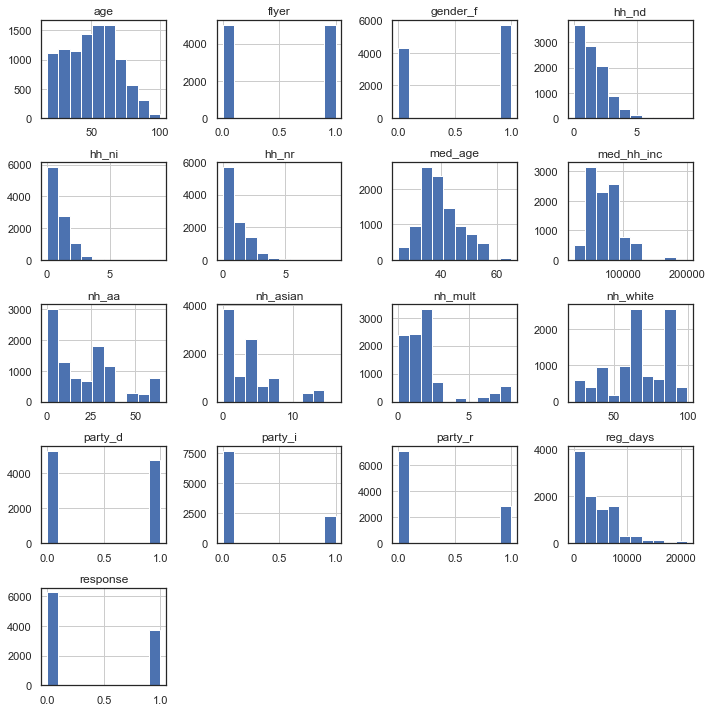

In [17]:
voters_df.hist(figsize=(10,10))
plt.tight_layout();

In [89]:
# split into train and test sets
from sklearn.model_selection import train_test_split

target = ['response']
features = [x for x in voters_df.columns if x not in target]

X_train, X_test, y_train, y_test = train_test_split(
    voters_df[features], voters_df[target], 
    test_size=0.2, random_state=42, stratify=voters_df[target]
)

print(f"Features: \n{features}")
print()
print(f"Targets: \n{target}")
print()
print(f"Training Set: {X_train.shape[0]} rows and {X_train.shape[1]} features")
print(f"Testing Set: {X_test.shape[0]} rows and {X_test.shape[1]} features")

Features: 
['age', 'gender_f', 'hh_nd', 'hh_nr', 'hh_ni', 'med_age', 'nh_white', 'nh_aa', 'nh_asian', 'nh_mult', 'reg_days', 'med_hh_inc', 'party_d', 'party_i', 'party_r', 'flyer']

Targets: 
['response']

Training Set: 8000 rows and 16 features
Testing Set: 2000 rows and 16 features


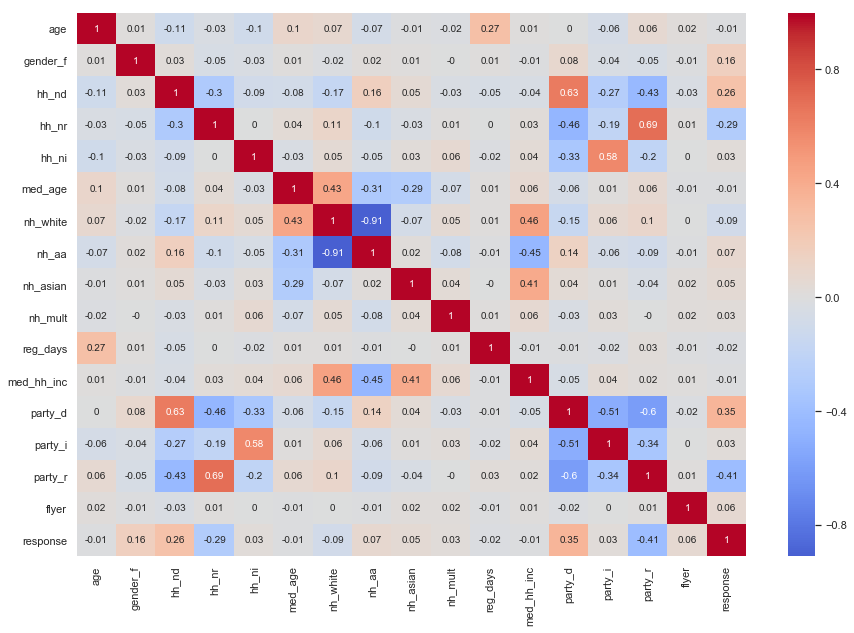

In [90]:
def plot_corr_map(corr_df):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(corr_df.round(2), 
                center=0,
                cmap='coolwarm',
                annot=True);

# combine train X,y sets for correlation
# full dataset
plot_corr_map(pd.concat([X_train, y_train], axis=1).corr())

In [91]:
train = pd.concat([X_train, y_train], axis=1)

flyer_corr = train[train.flyer == 1].corr()
no_flyer_corr = train[train.flyer == 0].corr()

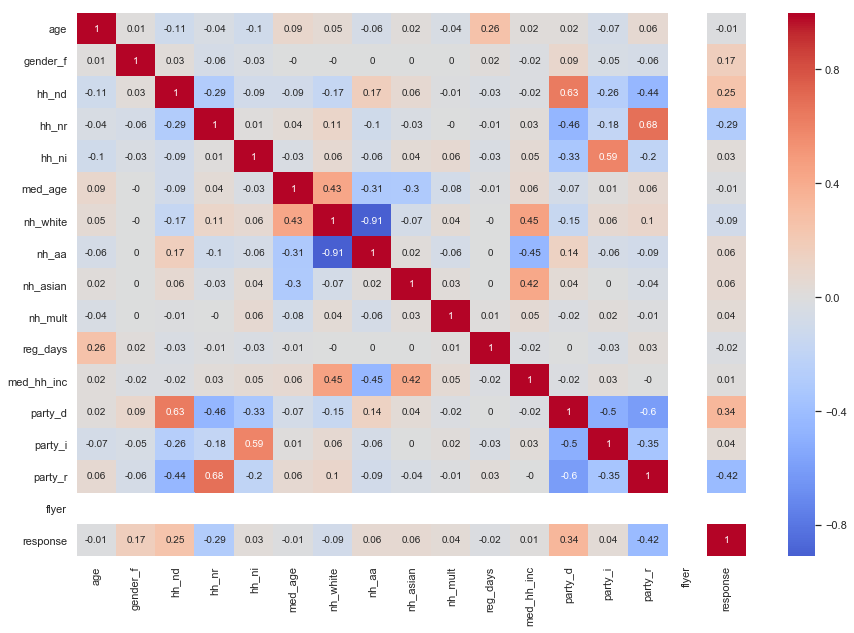

In [92]:
plot_corr_map(flyer_corr)

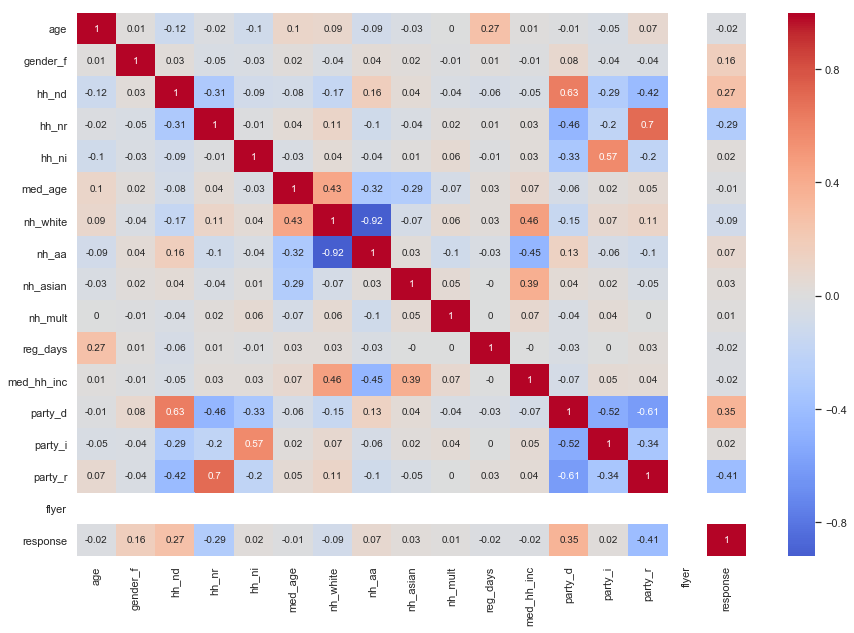

In [93]:
plot_corr_map(no_flyer_corr)

#### 4.3 Review Process

### 5. Encode Algorithms
#### 5.1 Develop Algorithms

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [118]:
def model_search(model, params):
    search = GridSearchCV(estimator=model, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=0, scoring='f1_weighted')

    search.fit(X_train, y_train)

    print(f"Best Model Parameters: {search.best_params_}")
    print(f"Best F1-weighted Score: {search.best_score_}")
    return search.best_estimator_

In [119]:
# Logistic regression model selection
logit_params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 9, 20)
}

logit = LogisticRegression()

best_logit = model_search(logit, logit_params)

Best Model Parameters: {'C': 6158.48211066026, 'penalty': 'l1'}
Best F1-weighted Score: 0.7013820330252495


In [120]:
# Decision tree model selection
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 8, 16, 32],
    'min_samples_leaf': [10, 20, 30, 40, 50, 100],
    'max_features': ['sqrt', 'log2', None]
}

tree = DecisionTreeClassifier(random_state=42)

best_tree = model_search(tree, tree_params)

Best Model Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 2}
Best F1-weighted Score: 0.7409712965817391


In [121]:
# Random forest model selection
rf_params = {
    'n_estimators': [250, 500, 750, 1000, 1250],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

best_rf = model_search(rf, rf_params)

Best Model Parameters: {'max_features': 'sqrt', 'n_estimators': 500}
Best F1-weighted Score: 0.7353815133700914


In [125]:
# fit best model
params = {
    'n_estimators': 1250,
    'max_features': 'sqrt'
}

#best_model = RandomForestClassifier(random_state=42, **params)

best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[900 353]
 [164 583]]
             precision    recall  f1-score   support

          0       0.85      0.72      0.78      1253
          1       0.62      0.78      0.69       747

avg / total       0.76      0.74      0.75      2000



Confusion matrix, without normalization
[[900 353]
 [164 583]]


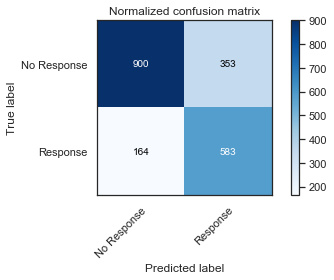

In [129]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['No Response', 'Response'], normalize=False,
                      title='Normalized confusion matrix')

plt.show()